In [1]:
# MN is using Kernel Python 3.10.13 for this module

# In this weeks Python sessions we’ll look at how we can feed our data into some ML code to get
# a decision tree going which can help us with categorisation problems, but in a way that’s maybe,
# more visually tractable.

# Here’s a link, again, to the google developers course on machine learning, but specifically to
# decision trees: https://developers.google.com/machine-learning/decision-forests/decision-trees
# It’s not required reading but it’ll help and will clear up things that I’m not always the best
# at explaining live, whilst also trying to remember code!

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
col_names = ['pregancies', 'glu', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv',
                 names=col_names,
                 skiprows=1)
 
df.head()

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
imp = SimpleImputer(strategy='mean')
 
error_cols = col_names[1:-1]
 
df[error_cols] =df[error_cols].replace(0, np.nan)
 
for column in error_cols:
    df[column] = imp.fit_transform(df[column].values.reshape(-1, 1))
 
df.head(10)

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0,1


In [5]:
features = col_names[:-1]
X = df[features]
y = df['label']

X.head(10)

# https://scikit-learn.org/stable/modules/impute.html

,pregancies,glu,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)
 
clf = DecisionTreeClassifier()
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

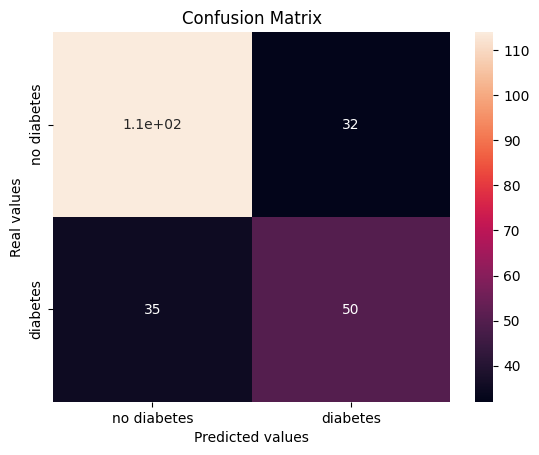

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred)
 
target_values = ['no diabetes', 'diabetes']
 
sns.heatmap(cm,
            annot=True,
            xticklabels=target_values,
            yticklabels=target_values)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Confusion Matrix')

In [9]:
print(f'Diabetes precision {51/82*100}')
print(f'Diabetes recall {51/85*100}')
print()
print(f'No Diabetes precision {120/154*100}')
print(f'No Diabetes recall {120/151*100}')

Diabetes precision 62.19512195121951
Diabetes recall 60.0

No Diabetes precision 77.92207792207793
No Diabetes recall 79.47019867549669


In [10]:
from sklearn.metrics import classification_report
output_report = classification_report(y_test, y_pred, target_names=target_values,
                                      output_dict=True)
 
output_report

{'no diabetes': {'precision': 0.7651006711409396,
  'recall': 0.7808219178082192,
  'f1-score': 0.7728813559322034,
  'support': 146.0},
 'diabetes': {'precision': 0.6097560975609756,
  'recall': 0.5882352941176471,
  'f1-score': 0.5988023952095808,
  'support': 85.0},
 'accuracy': 0.70995670995671,
 'macro avg': {'precision': 0.6874283843509577,
  'recall': 0.6845286059629332,
  'f1-score': 0.6858418755708922,
  'support': 231.0},
 'weighted avg': {'precision': 0.707939247962165,
  'recall': 0.70995670995671,
  'f1-score': 0.7088263270948747,
  'support': 231.0}}

In [11]:
# IN THE TERMINAL, run these 3 lines 1-by-1
# pip install pydotplus
# pip install graphviz
# conda install graphviz (not sure about this one)

# alternatively, in the codespace write the following:
# %pip install graphviz
# %pip install pydotplus
# %conda install graphviz

# "we have to install graphviz twice, this is how I could get it to work, I don't know why this is the case" Will
# if I do the "%conda install" it gives me a new error, so I'm not doing that.

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# MN ideas taken from module2_5.ipynb, websites, etc
# a)  import graphviz 
# b)  from sklearn.tree import graphviz
# can't import graphviz as not installed properly.

y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [67]:
# this last bit of code has a problem, "GraphViz's executables not found"

# https://github.com/data-to-insight/D2I-Jupyter-Notebook-Tools/blob/main/ml-data%20science%20tutorials/decision%20tree.ipynb

# see module2_4b.ipynb where the exercise from Will (at link above) has been copied & tested by MN.
# in that test there is still a problem with finding the graphviz executables

# Declan is using the same kernel (Python 3.10.13) but he is not having the same Graphviz problems.
# The only difference we can see is that in Declan's terminal the prompt does not say:
# (.conda) @MarkNunns ➜ /workspaces/Python_ESCC_course (main) $ 
# Declan's prompt just shows his username, that's it (fix this by typing "cd" <Enter> in the Terminal)
# in Terminal on RHS, go to Bash, this changes the prompt back to:
# @MarkNunns ➜ /workspaces/Python_ESCC_course (main) $

# Verify the environment
# https://coderefinery.github.io/installation/conda-environment/

# Declan is using the same kernel (Python 3.10.13) in the top right corner.
# Also, in the terminal when DF checks the Python version (using: "python --version") it says Python 3.10.13.

# For MN, it says Python 3.10.13 in the top right corner, but
# in the terminal when MN checks the Python version it says 3.12.5
# if I can get this changed, the code may start to work better.

In [12]:
# accuracy': 0.7186147186147186 ??

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

output_report

0.7662337662337663


{'no diabetes': {'precision': 0.7651006711409396,
  'recall': 0.7808219178082192,
  'f1-score': 0.7728813559322034,
  'support': 146.0},
 'diabetes': {'precision': 0.6097560975609756,
  'recall': 0.5882352941176471,
  'f1-score': 0.5988023952095808,
  'support': 85.0},
 'accuracy': 0.70995670995671,
 'macro avg': {'precision': 0.6874283843509577,
  'recall': 0.6845286059629332,
  'f1-score': 0.6858418755708922,
  'support': 231.0},
 'weighted avg': {'precision': 0.707939247962165,
  'recall': 0.70995670995671,
  'f1-score': 0.7088263270948747,
  'support': 231.0}}

In [ ]:
# The second attribute selection measure we looked at was entropy.
# Entropy is a measure of how homogenous the samples in a node are, or how random
# the samples in the node are. It can be though of as how messy the data is in a given node,
# or how much information our node gives us about the outcomes we want to predict.

# High entropy means the system is messy and doesn’t give us a lot of information about a prediction.
# When we use entropy as our splitting criteria, which we did for the second plot, this choses
# to split nodes will maximise the decrease in average entropy between
# nodes (this difference in average entropy is called information gain).
# Essentially then, when choosing entropy as our attribute selection method,
# we split nodes where, after that split, we have a more homogenous set of samples,
# which can be though of as having a better set of samples from which to make a prediction.